# Predicting the progression of diabetes using least-squares regression

The **diabetes** data set is provided as a single file, `diabetes-data.csv`. We obtained it at https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data. For some background information on the data, see this seminal paper:

Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.

## Set up notebook and load data set

In [3]:
# Standard includes
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Routines for linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Set label size for plots
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

This next snippet of code loads in the diabetes data. There are 442 data points, each with 10 predictor variables (which we'll denote `x`) and one response variable (which we'll denote `y`).

Make sure the file `'diabetes-data.csv'` is in the same directory as this notebook.

In [4]:
data = np.genfromtxt('diabetes.txt', delimiter='\t')
features = ['age', 'sex', 'body mass index', 'blood pressure', 
            'serum1', 'serum2', 'serum3', 'serum4', 'serum5', 'serum6']
print(data)
x = data[:,0:10] # predictors
y = data[:,10] # response variable



[[ 59.       2.      32.1    ...   4.8598  87.     151.    ]
 [ 48.       1.      21.6    ...   3.8918  69.      75.    ]
 [ 72.       2.      30.5    ...   4.6728  85.     141.    ]
 ...
 [ 60.       2.      24.9    ...   4.1271  95.     132.    ]
 [ 36.       1.      30.     ...   5.1299  85.     220.    ]
 [ 36.       1.      19.6    ...   4.5951  92.      57.    ]]


## Predict `y` without using `x`

If we want to predict `y` without knowledge of `x`, what value would be predict? The <font color="magenta">mean</font> value of `y`.

In this case, the mean squared error (MSE) associated with the prediction is simply the variance of `y`.

In [5]:
print ("Prediction: ", np.mean(y))
print ("Mean squared error: ", np.var(y))

Prediction:  152.13348416289594
Mean squared error:  5929.884896910383


## Predict `y` using a single feature of `x`

To fit a linear regression model, we could directly use the formula we saw in lecture. To make things even easier, this is already implemented in `sklearn.linear_model.LinearRegression()`.

Here we define a function, **one_feature_regression**, that takes `x` and `y`, along with the index `f` of a single feature and fits a linear regressor to `(x[f],y)`. It then plots the data along with the resulting line.

In [6]:
from sklearn.linear_model import LinearRegression

def one_feature_regression(x,y,f):
    if (f < 0) or (f > 9):
        print ("Feature index is out of bounds")
        return
    x1 = x[:,[f]]
    
    ### START CODE HERE ###
    #Craete an object of linear regression
    regr = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
    # call the fit method to fit the regression model
    regr.fit(x1,y)
    # Make predictions using the model
    y_pred = regr.predict(x1)
    ### END CODE HERE ###
    
    # Plot data points as well as predictions
    plt.plot(x1, y, 'bo')
    plt.plot(x1, y_pred, 'r-', linewidth=3)
    plt.xlabel(features[f], fontsize=14)
    plt.ylabel('Progression of disease', fontsize=14)
    plt.show()
    print ("Mean squared error: ", mean_squared_error(y, y_pred))
    return regr

Let's try this with feature #2 (body mass index).

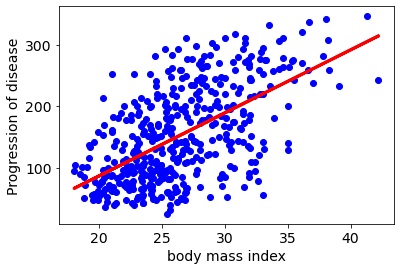

Mean squared error:  3890.456585461273
w =  [10.23312787]
b =  -117.77336656656533


In [7]:
regr = one_feature_regression(x,y,2)
print ("w = ", regr.coef_)
print ("b = ", regr.intercept_)

<font color="magenta">For you to try:</font> Feature #2 ('body mass index') is the single feature that yields the lowest mean squared error. Which feature is the second best? 

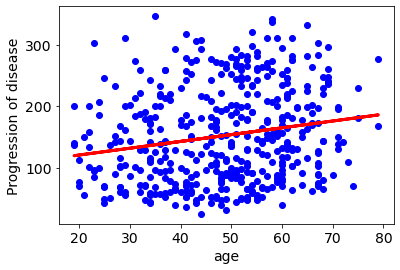

Mean squared error:  5720.547017205647


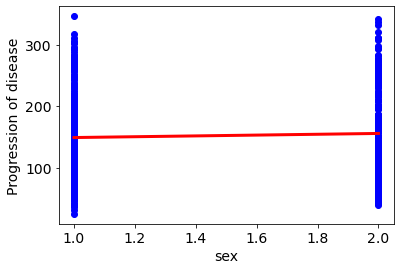

Mean squared error:  5918.888899586022


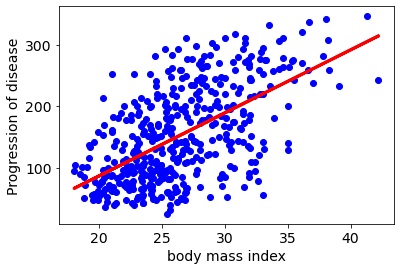

Mean squared error:  3890.456585461273


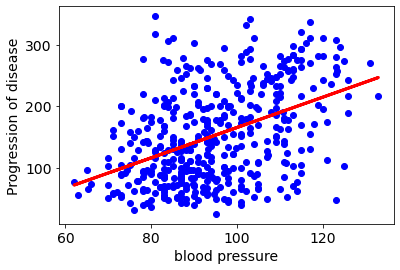

Mean squared error:  4774.113902368687


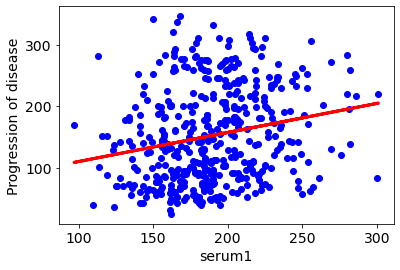

Mean squared error:  5663.315623739354


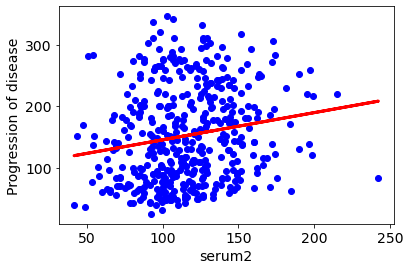

Mean squared error:  5750.241102677782


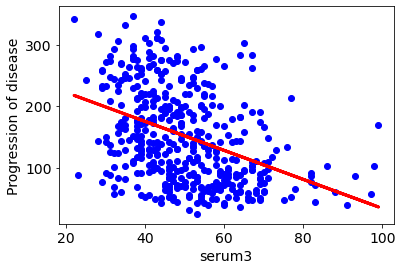

Mean squared error:  5005.661620710652


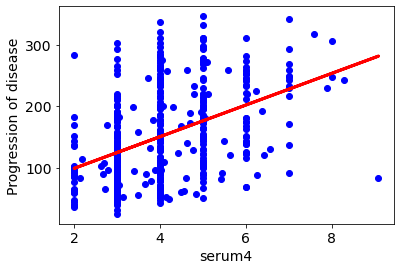

Mean squared error:  4831.13838643409


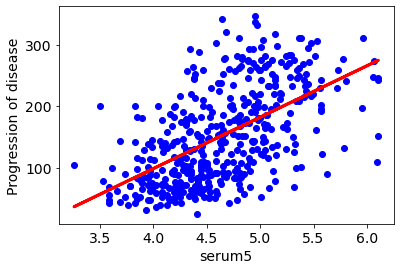

Mean squared error:  4030.998722591287


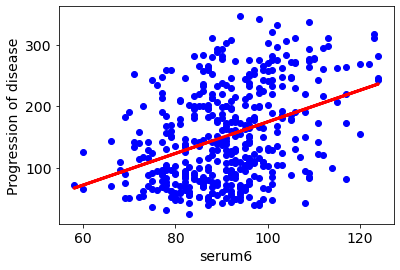

Mean squared error:  5062.380594520543
All errors:  [5720.547017205647, 5918.888899586022, 3890.456585461273, 4774.113902368687, 5663.315623739354, 5750.241102677782, 5005.661620710652, 4831.13838643409, 4030.998722591287, 5062.380594520543]
Second minimum =  4030.998722591287
Index of second minimum =  8
Second lowest MSE feature =  serum5


In [8]:
### You can use this space to figure out the second-best feature
MSE = []
length = len(features)
for i in range(length):
    regr = one_feature_regression(x,y,i)
    x1 = x[:,[i]]
    y_pred = regr.predict(x1)
    error = mean_squared_error(y, y_pred)
    MSE.append(error)
print("All errors: ", MSE)
sortedMSE = MSE.copy()
sortedMSE.sort()
print("Second minimum = ", sortedMSE[1])
index = MSE.index(sortedMSE[1])
print("Index of second minimum = ", index)
print("Second lowest MSE feature = ", features[index])



======================================

All errors:  [5720.547017205647, 5918.888899586022, 3890.456585461273, 4774.113902368687, 5663.315623739354, 5750.241102677782, 5005.661620710652, 4831.13838643409, 4030.998722591287, 5062.380594520543]

Second minimum =  4030.998722591287

Index of second minimum =  8

Second lowest MSE feature =  serum5

========================================


## Predict `y` using a specified subset of features from `x`

The function **feature_subset_regression** is just like **one_feature_regression**, but this time uses a list of features `flist`.

In [9]:
def feature_subset_regression(x,y,flist):
    if len(flist) < 1:
        print ("Need at least one feature")
        return
    for f in flist:
        if (f < 0) or (f > 9):
            print ("Feature index is out of bounds")
            return
    
    ### START CODE HERE ###
    #Craete an object of linear regression
    regr = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
    # call the fit method to fit the regression model
    x1 = x[:,flist]
    regr.fit(x1,y)
    ### END CODE HERE ###
    return regr

Try using just features #2 (body mass index) and #8 (serum5).

In [10]:
flist = [2,8]
regr = feature_subset_regression(x,y,[2,8])
print ("w = ", regr.coef_)
print ("b = ", regr.intercept_)
print ("Mean squared error: ", mean_squared_error(y, regr.predict(x[:,flist])))

w =  [ 7.27600054 56.05638703]
b =  -299.95751508023625
Mean squared error:  3205.1900768248533


Finally, use all 10 features.

In [11]:
regr = feature_subset_regression(x,y,range(0,10))
print ("w = ", regr.coef_)
print ("b = ", regr.intercept_)
print ("Mean squared error: ", mean_squared_error(y, regr.predict(x)))

w =  [-3.63612242e-02 -2.28596481e+01  5.60296209e+00  1.11680799e+00
 -1.08999633e+00  7.46450456e-01  3.72004715e-01  6.53383194e+00
  6.84831250e+01  2.80116989e-01]
b =  -334.5671385187877
Mean squared error:  2859.6963475867506


## Splitting the data into a training and test set

We define a procedure **split_data** that partitions the data set into separate training and test sets. It is invoked as follows:

* `trainx, trainy, testx, testy = split_data(n_train)`

Here:
* `n_train` is the desired number of training points
* `trainx` and `trainy` are the training points and response values
* `testx` and `testy` are the test points and response values

The split is done randomly, but the random seed is fixed, and thus the same split is produced if the procedure is called repeatedly with the same `n_train` parameter.
**Note:** You can also use python built-in libraries for splitting data like:
`from sklearn.model_selection import train_test_split`

In [12]:
def split_data(n_train):
    if (n_train < 0) or (n_train > 442):
        print ("Invalid number of training points")
        return
    np.random.seed(0)
    perm = np.random.permutation(442)
    training_indices = perm[range(0,n_train)]
    test_indices = perm[range(n_train,442)]
    trainx = x[training_indices,:]
    trainy = y[training_indices]
    testx = x[test_indices,:]
    testy = y[test_indices]
    return trainx, trainy, testx, testy

## Implementing the closed-form solution

We define a procedure **split_data** that partitions the data set into separate training and test sets. It is invoked as follows:

* `trainx, trainy, testx, testy = split_data(n_train)`

Here:
* `n_train` is the desired number of training points
* `trainx` and `trainy` are the training points and response values
* `testx` and `testy` are the test points and response values

The split is done randomly, but the random seed is fixed, and thus the same split is produced if the procedure is called repeatedly with the same `n_train` parameter.
**Note:** You can also use python built-in libraries for splitting data like:
`from sklearn.model_selection import train_test_split`

To fit a linear regression model, we can directly use the closed-form formula we saw in lecture. Implement a method to get the parameters of the linear regression using the closed-form solution. The method should take features `x` and predictions `y` of the training set and return back the parameter values including the bias term.

In [49]:
def linear_regression_CF(trainx, trainy):
    # inputs: trainx and trainy, the features and the target in the training set
    # output: a vector of weights including the bias term
    
    ### START CODE HERE ###
    X = trainx
    X_t = np.transpose(trainx)
    y = trainy
    i = np.dot(X_t, X)
    inv_i = np.linalg.inv(i)
    Xt_y = np.dot(X_t, y)
    w = np.dot(inv_i, Xt_y) 
    return w
    ### END CODE HERE ###
        


## Implementing the iterative solution

In this section, you you are required to implement the iterative (gradient descent) solution. The method should take features `x` and predictions `y` of the training set and return back the parameter values including the bias term. You should also initialize the hyper-parameters in the beginning of the method. Also, plot the the cost function at different iterations.
Here, the input consists of:
* training data `trainx, trainy`, where `trainx` and `trainy` are numpy arrays of dimension `m`-by-`n` and `m`, respectively (if there are `m` training points and `n` features)

The function should find the `n`-dimensional vector `w` and offset `b` that minimize the MSE loss function, and return:
* `w` and `b`
* `losses`, an array containing the MSE loss at each iteration

<font color="magenta">Advice:</font> First figure out the derivative, which has a relatively simple form. Next, when implementing gradient descent, think carefully about two issues.

1. What is the step size (learning rate)?
2. When has the procedure converged?

Take the time to experiment with different ways of handling these.

**Note:** You can use additional methods as helpers if you feel the need.

**Note:** MSE is the RSS value divided by the number of samples to get the mean.

In [100]:
def linear_regression_GD(trainx, trainy):
    # inputs: trainx and trainy, the features and the target in the training set
    # output: a vector of weights including the bias term
    
    ### START CODE HERE ###
    m, n = np.shape(trainx)
    w = np.zeros(n)
    b = np.zeros(m)
    c = 0.01 
    t = 5000  #iterations
    eta = c/t
    MSE = np.zeros(t)    
    X_t = np.transpose(trainx)
    for i in range(t):
        pred = np.dot(trainx, w)
        L = pred - trainy
        dL_dw = np.dot(X_t, L)
        dj_dw = (1/m)*dL_dw 
        w = w - eta * dj_dw   
        dL_db = (1/m)*L
        b = b - eta * dL_db
        MSE[i] = (1/(2*m)) * np.sum(np.square(L))
    #MSE = MSE[5:].copy()

    return w, b, MSE
    ### END CODE HERE ###


## Use diffrent amounts of training data to fit the model

Using the **split_data** procedure to partition the data set, compute the training MSE and test MSE when fitting a regressor to *all* features, for the following training set sizes:
* `n_train = 20`
* `n_train = 50`
* `n_train = 100`
* `n_train = 200`
* `n_train = 300`


1. Compare your results for the three approaches, i.e., using library, using closed-form solution (not mandatory), and using the iterative solution. Provide your comments on the results.
2. Compare the parameter values for the three solutions when using `n_train = 300` training samples.

**Analytical Questions:**

3. What changes you need to do if the unit of `y` is different?
4. What changes you need to do if the unit of one of the features was different? For example if **age** was in months and not in years. 
5. What if both 3 and 4 apply?

Mean squared error (Library):  6764.187243690134
Mean squared error (Closed Form):  6442.538440374736
Mean squared error (Gradient Descent):  4182.048656882071


Text(0, 0.5, 'MSE')

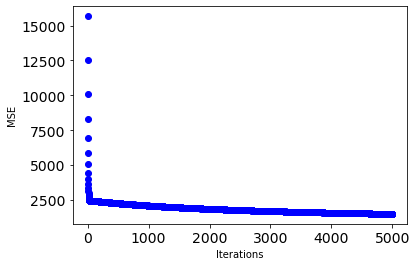

In [101]:
n_train=20
trainx, trainy, testx, testy = split_data(n_train)

regr = feature_subset_regression(trainx,trainy,range(0,10))
print ("Mean squared error (Library): ", mean_squared_error(testy, regr.predict(testx)))

w = linear_regression_CF(trainx,trainy)
pred = np.dot(testx, w)
loss = pred - testy
print ("Mean squared error (Closed Form): ", mean_squared_error(testy, pred))

w,b,losses = linear_regression_GD(trainx,trainy)
pred = np.dot(testx, w)
loss = pred - testy
print ("Mean squared error (Gradient Descent): ", mean_squared_error(testy, pred))

plt.plot(losses, 'bo')
plt.xlabel("Iterations")
plt.ylabel("MSE")

Mean squared error (Library):  7991.2709729121425
Mean squared error (Closed Form):  3441.0308087212047
Mean squared error (Gradient Descent):  4215.234920071058


Text(0, 0.5, 'MSE')

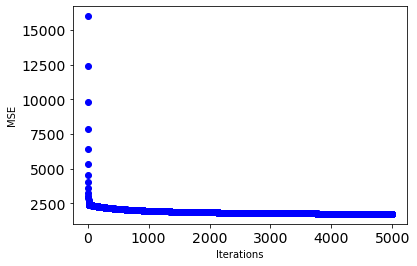

In [102]:
n_train=50
trainx, trainy, testx, testy = split_data(n_train)

regr = feature_subset_regression(trainx,trainy,range(0,10))
print ("Mean squared error (Library): ", mean_squared_error(testy, regr.predict(testx)))

w = linear_regression_CF(trainx,trainy)
pred = np.dot(testx, w)
loss = pred - testy
print ("Mean squared error (Closed Form): ", mean_squared_error(testy, pred))

w,b,losses = linear_regression_GD(trainx,trainy)
pred = np.dot(testx, w)
loss = pred - testy
print ("Mean squared error (Gradient Descent): ", mean_squared_error(testy, pred))

plt.plot(losses, 'bo')
plt.xlabel("Iterations")
plt.ylabel("MSE")

Mean squared error (Library):  3583.00851153032
Mean squared error (Closed Form):  3313.7297494336744
Mean squared error (Gradient Descent):  4143.7636645389675


Text(0, 0.5, 'MSE')

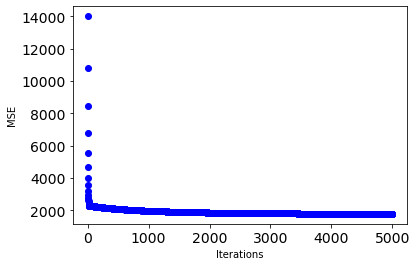

In [103]:
n_train=100
trainx, trainy, testx, testy = split_data(n_train)

regr = feature_subset_regression(trainx,trainy,range(0,10))
print ("Mean squared error (Library): ", mean_squared_error(testy, regr.predict(testx)))

w = linear_regression_CF(trainx,trainy)
pred = np.dot(testx, w)
loss = pred - testy
print ("Mean squared error (Closed Form): ", mean_squared_error(testy, pred))

w,b,losses = linear_regression_GD(trainx,trainy)
pred = np.dot(testx, w)
loss = pred - testy
print ("Mean squared error (Gradient Descent): ", mean_squared_error(testy, pred))

plt.plot(losses, 'bo')
plt.xlabel("Iterations")
plt.ylabel("MSE")

Mean squared error (Library):  3028.472046591937
Mean squared error (Closed Form):  3247.7330645066186
Mean squared error (Gradient Descent):  4011.7648975232655


Text(0, 0.5, 'MSE')

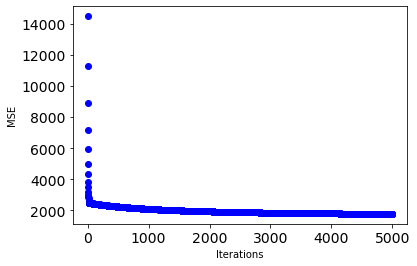

In [104]:
n_train=200
trainx, trainy, testx, testy = split_data(n_train)

regr = feature_subset_regression(trainx,trainy,range(0,10))
print ("Mean squared error (Library): ", mean_squared_error(testy, regr.predict(testx)))

w = linear_regression_CF(trainx,trainy)
pred = np.dot(testx, w)
loss = pred - testy
print ("Mean squared error (Closed Form): ", mean_squared_error(testy, pred))

w,b,losses = linear_regression_GD(trainx,trainy)
pred = np.dot(testx, w)
loss = pred - testy
print ("Mean squared error (Gradient Descent): ", mean_squared_error(testy, pred))

plt.plot(losses, 'bo')
plt.xlabel("Iterations")
plt.ylabel("MSE")

Mean squared error (Library):  2877.95421546128
Mean squared error (Closed Form):  3041.2983862476344
Mean squared error (Gradient Descent):  4121.514196648469


Text(0, 0.5, 'MSE')

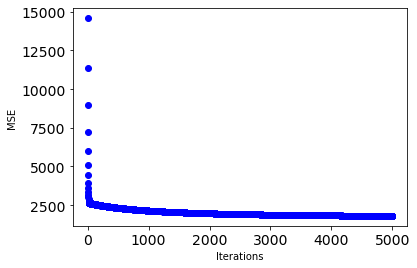

In [105]:
n_train=300
trainx, trainy, testx, testy = split_data(n_train)

regr = feature_subset_regression(trainx,trainy,range(0,10))
print ("Mean squared error (Library): ", mean_squared_error(testy, regr.predict(testx)))

w = linear_regression_CF(trainx,trainy)
pred = np.dot(testx, w)
loss = pred - testy
print ("Mean squared error (Closed Form): ", mean_squared_error(testy, pred))

w,b,losses = linear_regression_GD(trainx,trainy)
pred = np.dot(testx, w)
loss = pred - testy
print ("Mean squared error (Gradient Descent): ", mean_squared_error(testy, pred))

plt.plot(losses, 'bo')
plt.xlabel("Iterations")
plt.ylabel("MSE")

Based on these results, I can conclude that when the training data samples are lower, ie. 20, the MSE is highest as all of the models are underfitting the dataset.
At n_train = 50, the library implementation has far higher error than the closed form and gradient solutions, and at 100-200, closed form and library solutions have a lower cost than gradient descent.
At n_train = 300, the cost is the least from the library implementation  whichslightly outforms the closed form, gradient descent appears to lag behind the ideal solution.

For the case of age being in months, I assume feature scaling /normalization would be required.

If y is in a different unit compared to the test y values, than obviously one would need to be converted to the other. However, it would not change the predictor units

If both are different, perhaps a layer of translation for the y training data to the test data, followed by feature scaling for the age difference.